### cross-validation

In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately 
for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting 
up too much noise. For this purpose, we use the cross-validation technique.


Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data.
It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, 
and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold 
as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the 
model’s performance.


The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained too well on the
training data and performs poorly on new, unseen data. By evaluating the model on multiple validation sets, cross validation
provides a more realistic estimate of the model’s generalization performance, i.e., its ability to perform well on new, unseen
data.

In summary, cross validation is an important step in the machine learning process and helps to ensure that the model selected for deployment is robust and generalizes well to new data.


### types of cross validation
1. k-fold cross validation
2. leave-one-out cross validation
3. stratified cross validation
The choice of technique depends on the size and nature of the data, as well as the specific requirements of the modeling       problem.



### The three steps involved in cross-validation are as follows :

1. Reserve some portion of sample data-set.
2. Using the rest data-set train the model.
3. Test the model using the reserve portion of the data-set.

### method of cross validation

Validation In this method, we perform training on the 50% of the given data-set and rest 50% is used for the testing purpose.
The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 
50% of the data contains some important information which we are leaving while training our model i.e higher bias.
LOOCV (Leave One Out Cross Validation) In this method, we perform training on the whole data-set but leaves only one 
data-point of the available data-set and then iterates for each data-point. It has some advantages as well as disadvantages 
also. An advantage of using this method is that we make use of all data points and hence it is low bias. The major drawback 
of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data 
point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over 
‘the number of data points’ times. K-Fold Cross Validation In this method, we split the data-set into k number of subsets
(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained
model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

cross validation is used to evaluate the moldel not learn or tune a new model 
To do model tuning will look at how to tune a model's parameters using something called grid search 

### Example based on K-nn classifier with fruit dataset(2 features)

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('assets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [7]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)
X = X_fruits_2d.values
y = y_fruits_2d.values

cv_scores = cross_val_score(clf,X,y)
print("cross-validation score(3-fold)",cv_scores)
print("mean cross-validation score(3-fold):{:.3f}".format(np.mean(cv_scores)))

cross-validation score(3-fold) [0.75 0.75 0.83 0.83 0.82]
mean cross-validation score(3-fold):0.797


C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

### validation curve example

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3,3,4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [12]:
print(train_scores)

[[0.46 0.44 0.42]
 [0.85 0.72 0.75]
 [0.92 0.9  0.93]
 [1.   1.   0.97]]


In [13]:
print(test_scores)

[[0.5  0.3  0.32]
 [0.85 0.7  0.63]
 [0.55 0.85 0.68]
 [0.4  0.2  0.37]]


<IPython.core.display.Javascript object>


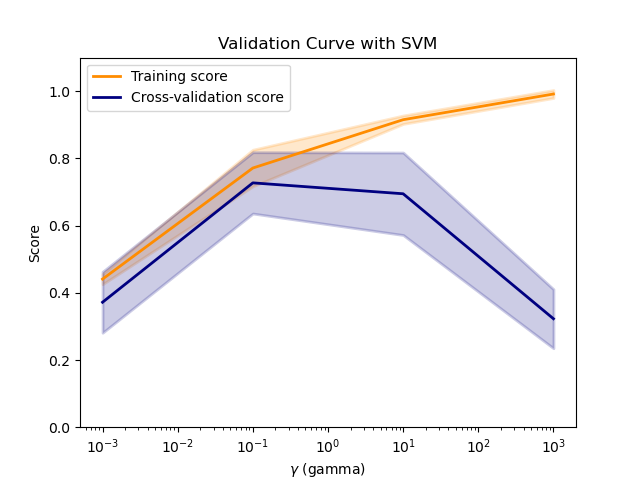

In [14]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()